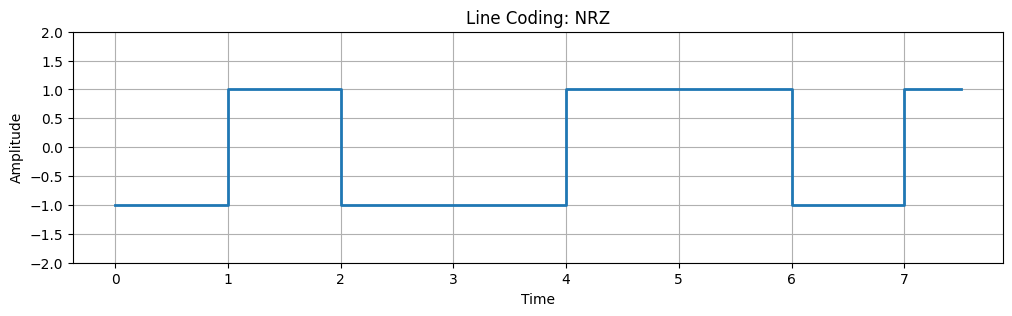

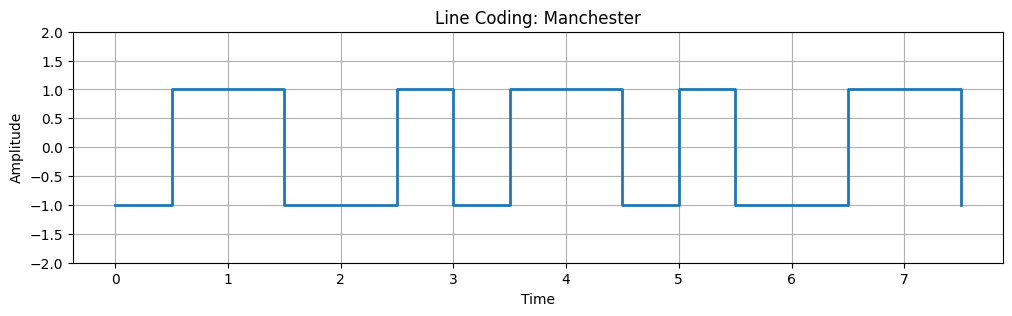

Original Data: [1, 0, 1, 1, 0, 0, 1, 0]
Block Coded Data (4B/5B): [1, 0, 1, 1, 1, 1, 0, 1, 0, 0]
Block Decoded Data (5B/4B): [1, 0, 1, 1, 0, 0, 1, 0]


In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Utility to plot the signals
def plot_signal(time, signal, title):
    """
    Plots a digital signal waveform.
    """
    plt.figure(figsize=(12, 3))
    plt.step(time, signal, where="post", linewidth=2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.ylim(-2, 2)
    plt.show()


# Line Coding: NRZ
def nrz_line_coding(data):
    """
    Non-Return-to-Zero-Level:
    Positive voltage for 1, Negative voltage for 0.
    """
    signal = []
    time = []
    for bit in data:
        signal.extend([-1 if bit else 1, -1 if bit else 1])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def manchester_line_coding(data):
    """
    Manchester Encoding:
    Each bit has a transition in the middle.
    High-to-Low for 1, Low-to-High for 0.
    """
    signal = []
    time = []
    for bit in data:
        if bit == 1:
            signal.extend([-1, 1])  # High-to-Low for 1
        else:
            signal.extend([1, -1])  # Low-to-High for 0
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


# Block Coding: 4B/5B
def block_coding(data):
    """
    Implements 4B/5B block coding.
    """
    mapping = {
        "0000": "11110", "0001": "01001", "0010": "10100", "0011": "10101",
        "0100": "01010", "0101": "01011", "0110": "01110", "0111": "01111",
        "1000": "10010", "1001": "10011", "1010": "10110", "1011": "10111",
        "1100": "11010", "1101": "11011", "1110": "11100", "1111": "11101"
    }
    # Convert input binary list into a string
    binary_data = ''.join(map(str, data))
    # Ensure binary data is divisible by 4
    while len(binary_data) % 4 != 0:
        binary_data += "0"  # Pad with zeros if needed
    # Break into 4-bit chunks and map to 5-bit encoding
    chunks = [binary_data[i:i + 4] for i in range(0, len(binary_data), 4)]
    coded = ''.join(mapping[chunk] for chunk in chunks)
    return list(map(int, coded))


# Block Decoding: 5B/4B
def block_decoding(data):
    """
    Implements 5B/4B block decoding.
    """
    reverse_mapping = {
        "11110": "0000", "01001": "0001", "10100": "0010", "10101": "0011",
        "01010": "0100", "01011": "0101", "01110": "0110", "01111": "0111",
        "10010": "1000", "10011": "1001", "10110": "1010", "10111": "1011",
        "11010": "1100", "11011": "1101", "11100": "1110", "11101": "1111"
    }
    binary_data = ''.join(map(str, data))
    chunks = [binary_data[i:i + 5] for i in range(0, len(binary_data), 5)]
    decoded = ''.join(reverse_mapping[chunk] for chunk in chunks)
    return list(map(int, decoded))


# Test the implementation
binary_data = [1, 0, 1, 1, 0, 0, 1, 0]  # Input binary data

# Line Coding (NRZ)
time, nrz_signal = nrz_line_coding(binary_data)
plot_signal(time, nrz_signal, "Line Coding: NRZ")

# Line Coding (Manchester)
time, manchester_signal = manchester_line_coding(binary_data)
plot_signal(time, manchester_signal, "Line Coding: Manchester")

# Block Coding (4B/5B)
coded_data = block_coding(binary_data)
decoded_data = block_decoding(coded_data)

# Print results for block coding
print(f"Original Data: {binary_data}")
print(f"Block Coded Data (4B/5B): {coded_data}")
print(f"Block Decoded Data (5B/4B): {decoded_data}")
